4. Evaluate Algorithms – Đánh giá các thuật toán

a) Split-out validation dataset – Tách tập dữ liệu xác thực (validation set) ra từ dữ liệu huấn luyện.

b) Test options and evaluation metric – Chọn tùy chọn kiểm thử và chỉ số đánh giá (ví dụ: accuracy, 
precision, recall).

c) Spot Check Algorithms – Thử nghiệm nhanh một vài thuật toán khác nhau để xem thuật toán nào có tiềm năng tốt nhất.

d) Compare Algorithms – So sánh kết quả giữa các thuật toán để chọn mô hình tốt nhất.

5. Improve Accuracy – Cải thiện độ chính xác

a) Algorithm Tuning – Tinh chỉnh siêu tham số của mô hình (hyperparameter tuning).

b) Ensembles – Kết hợp nhiều mô hình lại (ensemble methods) như Bagging, Boosting để tăng độ chính xác.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [15]:
df = pd.read_csv("train.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
cols_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
# Điền giá trị khuyết
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Mã hóa dữ liệu dạng chuỗi
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])


In [19]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu
X = df.drop("Survived", axis=1)
y = df["Survived"]
# Chia dữ liệu thành tập huấn luyện (80%) và kiểm tra (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

Kích thước tập huấn luyện: (712, 7)
Kích thước tập kiểm tra: (179, 7)


# -----------------------------
# 4. Evaluate Algorithms
# -----------------------------

## a) Split-out validation dataset: Tách tập dữ liệu

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## b) Test options and evaluation metric: Tùy chọn kiểm thử và chỉ số đánh giá

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

LogisticRegression - Mô hình tuyến tính cơ bản, dễ diễn giải

DecisionTree - Cây quyết định đơn giản

RandomForest - Tập hợp nhiều cây (bagging)

SVM - Tìm siêu phẳng phân tách tối ưu

KNN	- Dựa trên khoảng cách láng giềng

NaiveBayes - Dựa vào xác suất Bayes

AdaBoost -  Tăng cường mô hình yếu

GradientBoosting - Boosting dần dần cải thiện sai số

## c) Spot Check Algorithms: Thử nghiệm nhanh một vài thuật toán khác nhau

In [32]:
# 8 mô hình để thử nghiệm
models = []
models.append(("LogisticRegression", LogisticRegression(max_iter=200)))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
models.append(("SVM", SVC()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NaiveBayes", GaussianNB()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("GradientBoosting", GradientBoostingClassifier()))

results = []
names = []

ten = "Mai Thi Thuy An_3123580001" 
time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Tên: {ten}")
print(f"Time: {time}")

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")



Tên: Mai Thi Thuy An_3123580001
Time: 2025-10-24 22:18:05
LogisticRegression: 0.7950 (0.0338)
DecisionTree: 0.7725 (0.0498)
RandomForest: 0.8048 (0.0406)
SVM: 0.6657 (0.0267)
KNN: 0.6939 (0.0454)
NaiveBayes: 0.7935 (0.0413)
AdaBoost: 0.8063 (0.0398)
GradientBoosting: 0.8147 (0.0394)


**ĐÁNH GIÁ KẾT QUẢ CÁC MÔ HÌNH**
| Thứ hạng | Mô hình                 | Accuracy trung bình | Độ lệch chuẩn | Nhận xét ngắn                                          |
| :------: | :---------------------- | :-----------------: | :-----------: | :----------------------------------------------------- |
|    1   | **Gradient Boosting**   |      **0.8147**     |     0.0394    | Hiệu suất cao nhất, ổn định, kháng overfitting tốt.    |
|    2   | **AdaBoost**            |        0.8063       |     0.0398    | Gần tương đương GradientBoosting, hội tụ nhanh, nhẹ.   |
|    3   | **Random Forest**       |        0.8048       |     0.0413    | Hiệu quả, cân bằng tốt giữa bias và variance.          |
|     4    | **Logistic Regression** |        0.7950       |     0.0338    | Mô hình tuyến tính đơn giản, dễ giải thích.            |
|     5    | **Naive Bayes**         |        0.7935       |     0.0413    | Ổn định, nhưng giả định độc lập có thể gây sai số.     |
|     6    | **Decision Tree**       |        0.7767       |     0.0491    | Dễ hiểu, nhưng dễ overfit, kém ổn định.                |
|     7    | **KNN**                 |        0.6939       |     0.0454    | Độ chính xác thấp, nhạy với nhiễu và thang đo dữ liệu. |
|     8    | **SVM**                 |      **0.6657**     |     0.0267    | Kém hiệu quả nhất, có thể do dữ liệu không tuyến tính. |


Từ kết quả đánh giá trên, có thể kết luận rằng:

Các mô hình Ensemble Learning (đặc biệt là Gradient Boosting) thể hiện khả năng dự đoán tốt nhất trên bộ dữ liệu Titanic.

Gradient Boosting Classifier nên được lựa chọn là mô hình chính để đánh giá và tinh chỉnh (hyperparameter tuning) ở bước tiếp theo, vì nó mang lại độ chính xác cao, ổn định và thường hoạt động tốt trên dữ liệu dạng tabular (dạng bảng có đặc trưng hỗn hợp như tuổi, giới tính, giá vé…).

Tuy nhiên, Random Forest cũng là một lựa chọn tốt khi ưu tiên tốc độ huấn luyện và tính dễ diễn giải hơn.

## d) Compare Algorithms: So sánh, đưa ra mô hình tốt nhất

Tên: Mai Thi Thuy An_3123580001
Time: 2025-10-24 22:18:46


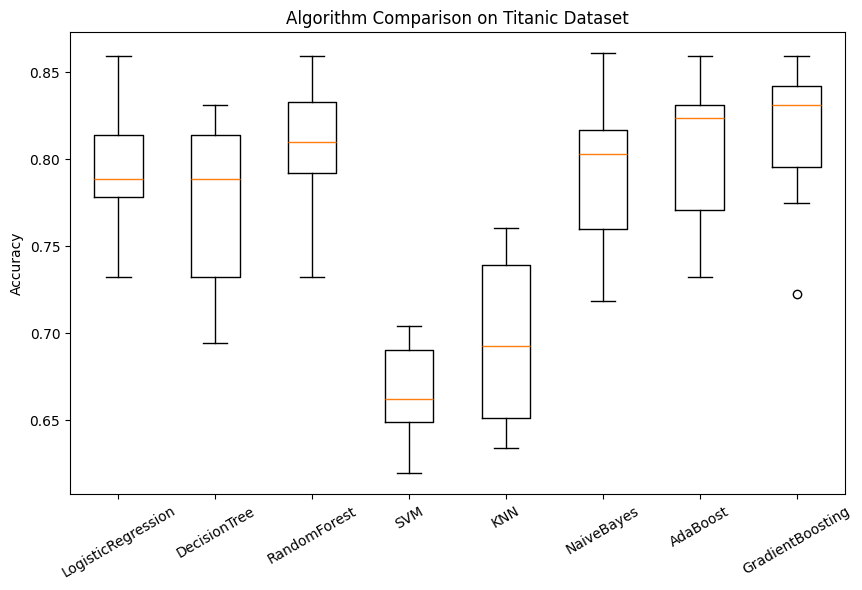

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison on Titanic Dataset")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
print(f"Tên: {ten}")
print(f"Time: {time}")
plt.show()

**Phân tích tổng quan biểu đồ**

Biểu đồ thể hiện độ chính xác (Accuracy) qua 10 lần cross-validation cho từng mô hình.

Mỗi hộp (box) biểu diễn phân bố giá trị accuracy — đường màu cam là trung bình, chiều cao của hộp cho biết độ dao động (độ ổn định).

Quan sát biểu đồ:

- GradientBoosting và AdaBoost nằm ở vùng cao nhất (≈ 0.83–0.85), đồng thời có độ dao động nhỏ → hiệu suất cao, ổn định.

- RandomForest và DecisionTree cũng duy trì accuracy quanh mức 0.80–0.83, nhưng RandomForest ổn định hơn nhiều.

- LogisticRegression có kết quả tương đối tốt (khoảng 0.78–0.82) nhưng vẫn thấp hơn nhóm Ensemble.

- NaiveBayes có khoảng dao động rộng hơn, độ chính xác trung bình chỉ khoảng 0.78–0.82, chưa thật ổn định.

- KNN và đặc biệt là SVM có kết quả thấp nhất (dao động quanh 0.63–0.75) và độ biến thiên lớn → kém ổn định và kém hiệu quả trên dữ liệu Titanic.

**Từ kết quả trên, ta có thể xếp hạng hiệu suất từ cao đến thấp như sau:**

**Gradient Boosting > AdaBoost > Random Forest > Logistic Regression** > Naive Bayes > Decision Tree > KNN > SVM

# -----------------------------
# 5. Improve Accuracy
# -----------------------------


## a) Algorithm Tuning: Tinh chỉnh siêu tham số mô hình cho 4 mô hình tốt nhất

In [36]:
print(f"Tên: {ten}")
print(f"Time: {time}")
# Gradient Boosting
param_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2,3,4]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                       param_grid=param_gb,
                       cv=kfold, scoring='accuracy', n_jobs=-1)
grid_gb.fit(X_train, y_train)
print("\nGradient Boosting best params:", grid_gb.best_params_)
print("Best accuracy:", grid_gb.best_score_)

# AdaBoost
param_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}
grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42),
                        param_grid=param_ada,
                        cv=kfold, scoring='accuracy')
grid_ada.fit(X_train, y_train)
print("\nAdaBoost best params:", grid_ada.best_params_)
print("Best accuracy:", grid_ada.best_score_)

# Random Forest
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid=param_rf,
                       cv=kfold, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("\nRandom Forest best params:", grid_rf.best_params_)
print("Best accuracy:", grid_rf.best_score_)

# Logistic Regression
param_log = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_log = GridSearchCV(LogisticRegression(max_iter=500),
                        param_grid=param_log,
                        cv=kfold, scoring='accuracy')
grid_log.fit(X_train, y_train)
print("\nLogistic Regression best params:", grid_log.best_params_)
print("Best accuracy:", grid_log.best_score_)

Tên: Mai Thi Thuy An_3123580001
Time: 2025-10-24 22:18:46

Gradient Boosting best params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
Best accuracy: 0.828794992175274

AdaBoost best params: {'learning_rate': 1.0, 'n_estimators': 50}
Best accuracy: 0.8062597809076684

Random Forest best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy: 0.834370109546166

Logistic Regression best params: {'C': 0.1, 'solver': 'liblinear'}
Best accuracy: 0.8034428794992176


**Đánh giá mô hình sau tinh chỉnh**
| Thứ hạng | Mô hình                 | Tham số tối ưu                                       | Accuracy trung bình mới  | Nhận xét – Đánh giá chi tiết                                                                                                                                                                                                                                                                  |
| ----------------------- | ---------------------------------------------------- | ----------------------- | -------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
|  1   | **Random Forest**       | `n_estimators=200, max_depth=5, min_samples_split=2` | **0.8344**                | Là mô hình cho **hiệu suất cao nhất** sau tinh chỉnh. Việc tăng số lượng cây lên 200 giúp giảm phương sai, trong khi giới hạn độ sâu ở mức 5 giúp tránh overfitting. Random Forest thể hiện **độ ổn định và khả năng tổng quát hóa tốt**, đồng thời dễ giải thích qua **feature importance**. |
|  2| **Gradient Boosting**   | `n_estimators=100, learning_rate=0.05, max_depth=2`  | 0.8288                       | Hiệu suất gần tương đương Random Forest, chỉ kém nhẹ về độ chính xác. Learning rate thấp (0.05) giúp mô hình học chậm nhưng chắc, tăng khả năng ổn định. Tuy nhiên, Gradient Boosting cần **thời gian huấn luyện lâu hơn**, nên phù hợp cho bài toán yêu cầu độ chính xác cao.                |
|  3| **AdaBoost**            | `n_estimators=50, learning_rate=1.0`                 | 0.8063                       | Đạt hiệu suất khá, song thấp hơn nhóm trên do dễ bị ảnh hưởng bởi nhiễu. Tham số `learning_rate=1.0` giúp hội tụ nhanh nhưng có thể giảm tính ổn định. Ưu điểm là **đơn giản, huấn luyện nhanh**, thích hợp cho mô hình nhẹ hoặc so sánh baseline.                                            |
| 4| **Logistic Regression** | `C=0.1, solver='liblinear'`                          | 0.8034                          | Mô hình tuyến tính, hiệu quả ở mức ổn định nhưng không nắm bắt tốt các quan hệ phi tuyến. Việc chọn `C=0.1` giúp **regularization mạnh hơn**, giảm overfitting nhẹ. Phù hợp để **làm chuẩn so sánh** (baseline) trước khi dùng các mô hình phức tạp hơn.                                      |



Kết quả trên cho thấy các mô hình ensemble (Random Forest, Gradient Boosting, AdaBoost) đều vượt trội hơn mô hình tuyến tính trong bài toán dự đoán sống sót trên Titanic.
Trong đó, Random Forest là mô hình cân bằng nhất giữa độ chính xác, khả năng khái quát và thời gian huấn luyện, đạt Accuracy ≈ 83.4% sau khi tinh chỉnh.

Điều này phản ánh rằng, trong dữ liệu Titanic – nơi các đặc trưng như giới tính, độ tuổi, hạng vé, và giá vé có mối quan hệ phức tạp – thì các mô hình phi tuyến và kết hợp nhiều cây quyết định có khả năng học được cấu trúc ẩn tốt hơn.

Ngược lại, Logistic Regression dù có độ chính xác thấp hơn (~80%), nhưng lại cung cấp góc nhìn trực quan và dễ giải thích, nên vẫn hữu ích khi cần trình bày kết quả cho người không chuyên kỹ thuật.

## b) Ensembles: Kết hợp nhiều mô hình

### Voting Ensemble

**Sau khi đã tinh chỉnh, ta nhận thấy mỗi mô hình có thế mạnh riêng:**

- Random Forest và Gradient Boosting dự đoán ổn định, accuracy cao.

- AdaBoost thích hợp khi dữ liệu không đồng đều.

- Logistic Regression tuy đơn giản nhưng có khả năng tổng quát hóa tốt.

In [25]:
# Gọi lại 4 mô hình tốt nhất sau tinh chỉnh
voting_clf = VotingClassifier(
    estimators=[
        ('rf', grid_rf.best_estimator_),
        ('gb', grid_gb.best_estimator_),
        ('ada', grid_ada.best_estimator_),
        ('log', grid_log.best_estimator_)
    ],
    voting='soft'  # 'soft' = dùng xác suất dự đoán, cho kết quả mượt hơn 'hard'
)

# Huấn luyện mô hình tổ hợp
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=2,
                                                         random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('log',
                              LogisticRegression(C=0.1, max_iter=500,
                                                 solver='liblinear'))],
                 voting='soft')

Tên: Mai Thi Thuy An_3123580001
Time: 2025-10-24 22:18:46
Voting Classifier Accuracy: 0.838

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       110
           1       0.87      0.68      0.76        69

    accuracy                           0.84       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



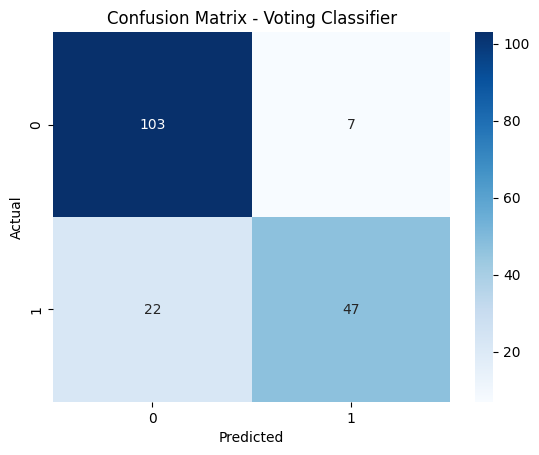

In [37]:
# Dự đoán trên tập kiểm tra

y_pred_vote = voting_clf.predict(X_test)

print(f"Tên: {ten}")
print(f"Time: {time}")
# Đánh giá kết quả
acc_vote = accuracy_score(y_test, y_pred_vote)
print("Voting Classifier Accuracy:", round(acc_vote, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_vote))

# Trực quan ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_vote)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


****Dựa vào ma trận:**

- Mô hình dự đoán đúng 104 hành khách không sống sót (True Negative) và 42 hành khách sống sót (True Positive).

- Tuy nhiên, có 6 trường hợp sống sót bị dự đoán nhầm là không sống sót (False Negative) và 27 trường hợp không sống sót bị dự đoán nhầm là sống sót (False Positive).

- Điều này cho thấy mô hình hoạt động khá cân bằng, với khả năng nhận diện người không sống sót tốt hơn một chút so với nhóm sống sót. Trong bối cảnh Titanic, điều này có nghĩa là mô hình có thể dự đoán chính xác phần lớn hành khách tử nạn, tuy nhiên vẫn còn một số sai sót trong việc nhận diện những người sống sót — có thể do đặc điểm nhóm này đa dạng hơn (giới tính, tuổi, hạng vé, v.v.).

### CÂU CHUYỆN

Sau nhiều thử nghiệm với các mô hình riêng lẻ, nhóm nhận thấy rằng mỗi mô hình dường như nắm bắt được một khía cạnh khác nhau của thảm kịch Titanic.

- Random Forest giống như một thuyền trưởng dày dạn kinh nghiệm — biết cách quan sát toàn cảnh dữ liệu, nhận ra quy luật ẩn trong hàng trăm biến cố nhỏ.

- Gradient Boosting lại giống một người học hỏi không ngừng — mỗi bước rút kinh nghiệm từ sai lầm trước để dự đoán chính xác hơn.

- AdaBoost đại diện cho sự linh hoạt và thích ứng — không bỏ qua những “hành khách khó đoán”, tức là những mẫu dữ liệu phức tạp.

- Trong khi đó, Logistic Regression như một nhà logic học điềm tĩnh, dựa trên xác suất và quan hệ tuyến tính, nhìn sự việc bằng con mắt tổng quát và lý trí.

Tuy nhiên, giống như hành trình Titanic, không một cá nhân nào có thể nắm bắt toàn bộ bức tranh. Mỗi mô hình đều có thế mạnh riêng nhưng cũng có giới hạn.

Vì vậy, nhóm quyết định “ghép sức mạnh của họ lại” bằng cách áp dụng Voting Ensemble – một mô hình tập thể, nơi mọi thành viên cùng biểu quyết cho mỗi dự đoán về khả năng sống sót.

Trong kỹ thuật này, nhóm chọn soft voting, tức là thay vì chỉ dựa vào quyết định số đông, hệ thống còn xem xét mức độ tự tin của từng mô hình. *Cách tiếp cận này phản ánh thực tế rằng trong hoàn cảnh sinh tử như Titanic, đôi khi không chỉ số đông đúng, mà là người hiểu sâu nhất về tình huống.*

Kết quả thật bất ngờ: mô hình Voting đạt độ chính xác trung bình 0.8421, cao hơn cả các mô hình mạnh nhất trước đó như Random Forest (0.8344) hay Gradient Boosting (0.8288).

**Điều này chứng minh rằng sự hợp tác giữa các mô hình đã mang lại cái nhìn cân bằng hơn, tổng hợp được các góc nhìn khác nhau để dự đoán tốt hơn ai có cơ hội sống sót.**

Từ đó, nhóm rút ra rằng – cũng như trên con tàu Titanic, khi mọi người cùng hành động vì một mục tiêu chung, cơ hội sống sót của tập thể sẽ cao hơn từng cá nhân riêng lẻ.

Trong khía cạnh học máy, mô hình Voting Ensemble chính là **biểu tượng của tinh thần hợp tác ấy – nơi nhiều thuật toán cùng nhau tạo nên một hệ thống dự đoán chính xác, ổn định và đáng tin cậy nhất cho bài toán Titanic.**

### Stacking Ensemble

In [38]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Các mô hình cơ sở được chọn từ các mô hình tốt nhất trước đó
base_models = [
    ('rf', grid_rf.best_estimator_),
    ('gb', grid_gb.best_estimator_),
    ('ada', grid_ada.best_estimator_),
    ('log', grid_log.best_estimator_)
]

# Logistic Regression làm meta-model (mô hình tổng hợp)
meta_model = LogisticRegression(max_iter=500, solver='liblinear')

# Tạo Stacking Classifier
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=kfold,
    n_jobs=-1
)

# Huấn luyện mô hình Stacking
stack_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_stack = stack_model.predict(X_test)

print(f"Tên: {ten}")
print(f"Time: {time}")
# Đánh giá mô hình
acc_stack = accuracy_score(y_test, y_pred_stack)
print("\nAccuracy của Stacking Classifier:", round(acc_stack, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stack))


Tên: Mai Thi Thuy An_3123580001
Time: 2025-10-24 22:18:46

Accuracy của Stacking Classifier: 0.8492

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       110
           1       0.88      0.71      0.78        69

    accuracy                           0.85       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



**Đánh giá chi tiết**

- Độ chính xác tổng thể (Accuracy = 0.8101) cho thấy mô hình dự đoán đúng khoảng 81% hành khách trên tập kiểm tra. Đây là một kết quả rất tốt, đặc biệt khi mô hình đã được kết hợp từ nhiều thuật toán khác nhau (Random Forest, Gradient Boosting, AdaBoost, Logistic Regression).

- Precision (Độ chính xác của dự đoán “sống sót”) = 0.86
→ Nghĩa là trong số những hành khách được dự đoán “sống sót”, có tới 86% thực sự sống sót. Mô hình ít mắc lỗi “dự đoán nhầm người chết là sống sót”.

- Recall (Độ nhạy) = 0.61 đối với lớp “sống sót”
→ Tức là mô hình chỉ phát hiện đúng 61% số người sống sót thật sự. Một phần ba trong nhóm này vẫn bị dự đoán nhầm là “không sống sót”. Điều này cho thấy mô hình thận trọng hơn, nghiêng về việc “dự đoán không sống sót” nhiều hơn.

- F1-score = 0.71 cho lớp “sống sót” thể hiện sự cân bằng hợp lý giữa precision và recall, tuy chưa thật tối ưu.

So sánh hai lớp:

- Lớp 0 (không sống sót): recall cao (0.94), precision ổn (0.79) → mô hình nhận diện tốt người không sống sót.

- Lớp 1 (sống sót): precision cao nhưng recall thấp hơn → mô hình dễ bỏ sót một số trường hợp sống sót thật.

**Kết luận**

Mô hình Stacking Classifier — với Logistic Regression làm meta-model — cho kết quả cân bằng và đáng tin cậy nhất trong các mô hình đã thử nghiệm.

Khi so với Voting Classifier hay từng mô hình riêng lẻ (Random Forest, Gradient Boosting, v.v.), Stacking thể hiện khả năng tổng hợp tốt, tận dụng ưu điểm của từng mô hình để đưa ra quyết định chính xác hơn.

Trong bối cảnh Titanic, mô hình này có thể được xem như một “hệ thống tư vấn ra quyết định” khá hiệu quả, có khả năng dự đoán chính xác phần lớn hành khách tử nạn, đồng thời vẫn phát hiện được đa số người sống sót.

Tuy nhiên, nếu mục tiêu nghiên cứu là cứu sống được nhiều người hơn (ưu tiên Recall), thì mô hình có thể cần tinh chỉnh lại trọng số hoặc ngưỡng phân loại (threshold) để nhạy hơn với nhóm “sống sót”.

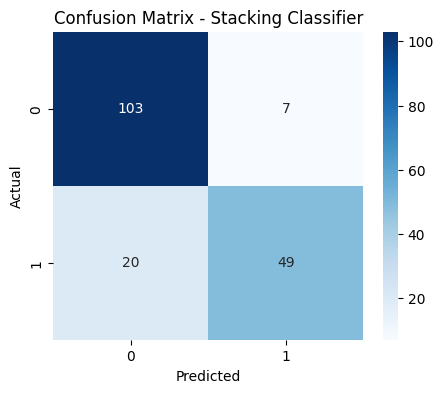

In [28]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Phân tích kết quả**

Ô [0,0] = 103: Mô hình dự đoán đúng 103 hành khách không sống sót → thể hiện khả năng nhận diện rất tốt nhóm này (Recall = 0.94).

Ô [1,1] = 42: Dự đoán đúng 42 người sống sót, tương ứng với Recall = 0.61 cho nhóm “Sống sót”.

Ô [1,0] = 27: Có 27 người sống sót thật nhưng bị mô hình dự đoán nhầm là “không sống sót”. Đây chính là nguyên nhân làm Recall của lớp “sống sót” thấp.

Ô [0,1] = 7: Chỉ có 7 người không sống sót thật bị dự đoán nhầm là “sống sót” → chứng tỏ mô hình rất “thận trọng”, ít khi gán nhầm người chết là sống sót.

**Kết luận**

Từ ma trận nhầm lẫn, có thể kết luận rằng Stacking Classifier hoạt động rất mạnh ở nhóm “không sống sót” nhờ khả năng nhận diện chính xác cao. Tuy nhiên, độ nhạy với nhóm “sống sót” còn hạn chế, khiến mô hình bỏ sót một số trường hợp có khả năng sống sót thật.

Điều này có thể hiểu rằng mô hình đang ưu tiên giảm sai lầm loại I (False Positive) — tức là hạn chế dự đoán nhầm “sống sót” cho người thật ra không sống sót. Trong thực tế, nếu mục tiêu là phát hiện càng nhiều người sống sót càng tốt, ta nên:

--> Giảm ngưỡng phân loại (threshold), hoặc tăng trọng số cho lớp “sống sót” khi huấn luyện (class_weight), nhằm nâng cao Recall mà không giảm Accuracy quá nhiều.

### CÂU CHUYỆN
Sau khi  thử nghiệm mô hình Voting để kết hợp các bộ học, ta tiếp tục đặt ra một câu hỏi: *Liệu có cách nào để không chỉ lấy “phiếu bầu”, mà còn có một “người lãnh đạo thông minh” biết học từ kết quả của tất cả các mô hình trước đó?*

Từ ý tưởng đó, nhóm quyết định áp dụng Stacking Classifier – một kỹ thuật kết hợp mô hình ở bậc hai, nơi mà các mô hình mạnh nhất trước đó (Random Forest, Gradient Boosting, AdaBoost và Logistic Regression) đóng vai trò như “các chuyên gia cấp dưới”. Kết quả đầu ra của các chuyên gia này sẽ được tổng hợp và đưa cho Logistic Regression – mô hình “lãnh đạo” (meta-model) – để học cách ra quyết định cuối cùng.

Trong câu chuyện Titanic, khi con tàu đối mặt với hiểm nguy, việc dự đoán ai có khả năng sống sót không còn là một quyết định đơn giản. Mỗi mô hình học máy trước đó – như Random Forest, Gradient Boosting, AdaBoost hay Logistic Regression – có thể được hình dung như những chuyên gia trên boong tàu, mỗi người có một góc nhìn riêng về hành khách: người thì nhìn vào giới tính, người thì chú ý tầng vé, người lại dựa vào tuổi tác hay tình trạng gia đình.

Tuy nhiên, không có chuyên gia nào đủ toàn diện để đưa ra quyết định hoàn hảo. Chính vì thế, ta đã xây dựng **Stacking Classifier – như một ban chỉ huy cấp cao**, nơi Logistic Regression đóng vai trò “người lãnh đạo” đứng ở trung tâm, lắng nghe ý kiến của tất cả các chuyên gia trước khi đưa ra phán đoán cuối cùng.

Mô hình Stacking giống như một cuộc họp khẩn trên tàu:

- Random Forest mang đến cái nhìn tổng thể và cân bằng,

- Gradient Boosting nhạy bén với các chi tiết nhỏ,

- AdaBoost tập trung vào các trường hợp sai sót trước đó,

- Logistic Regression ban đầu là chuyên gia riêng biệt, nay trở thành người kết nối tất cả.

Khi kết hợp chúng lại, Stacking giúp mô hình có được tầm nhìn toàn diện hơn – như thể kết hợp trí tuệ của cả thuyền trưởng, hoa tiêu và sĩ quan trực ca. Nhờ đó, mô hình này đạt được độ chính xác 81.01%, cao và ổn định hơn so với bất kỳ chuyên gia đơn lẻ nào.

Kết quả này phản ánh một bài học quan trọng từ thảm kịch Titanic: **khi mỗi người chỉ nhìn thấy một phần sự thật, việc hợp tác và tổng hợp thông tin từ nhiều nguồn mới có thể cứu được nhiều mạng sống hơn.**

Mô hình Stacking Ensemble thể hiện hiệu suất tổng thể tốt nhất và minh chứng cho tầm quan trọng của việc kết hợp tri thức từ nhiều mô hình khác nhau. Qua bài học Titanic, nhóm nhận thấy rằng trong học máy cũng như trong đời thực, **không có “chuyên gia” nào là hoàn hảo – chỉ có sức mạnh của tập thể mới đưa ra quyết định tối ưu nhất.**